In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import importlib
from __imports__ import *
import data, LSTM_returns, optimization
importlib.reload(data)

<module 'data' from 'c:\\Users\\27904\\OneDrive\\桌面\\crypto\\AAA_Thursday1\\data\\__init__.py'>

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load your asset
df = data.load_asset('BTCUSDT', sampling='1d')
df = data.add_fear_and_greed(df)
df = df[df.index >= '2020-01-01']

# Parameters
ma_window = 20  # Moving average window
sentiment_threshold_greedy = 65
sentiment_threshold_fear = 35

# Calculate Moving Average
df['MA'] = df['Close'].rolling(window=ma_window).mean()

# Initialize position column
# New: Initialize current position
df['Position'] = 0

current_position = 0

for t in range(ma_window, len(df)):
    today_close = df['Close'].iloc[t]
    today_ma = df['MA'].iloc[t]

    if today_close > today_ma:
        current_position = 1  # Long
    elif today_close < today_ma:
        current_position = -1  # Short

    df.iloc[t, df.columns.get_loc('Position')] = current_position





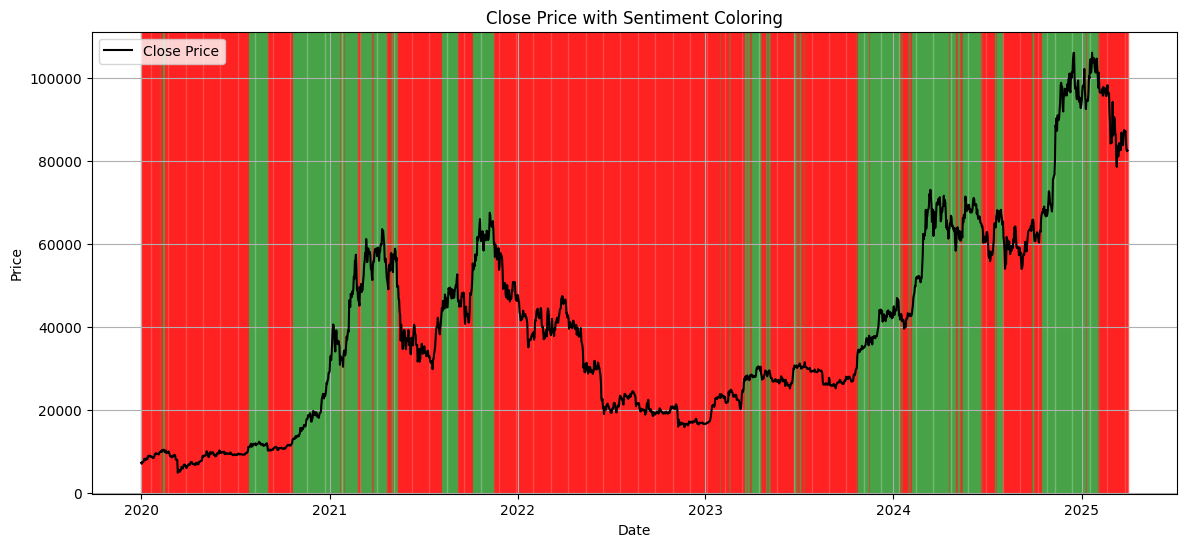

In [49]:
# Set thresholds
fear_threshold = 60
greed_threshold = 40

fig, ax = plt.subplots(figsize=(14,6))

# Plot Close price
ax.plot(df.index, df['Close'], label='Close Price', color='black')

# Color background by sentiment
for idx in range(len(df)):
    if df['F&G'].iloc[idx] <= fear_threshold:
        ax.axvspan(df.index[idx], df.index[idx], color='red', alpha=0.3)
    elif df['F&G'].iloc[idx] >= greed_threshold:
        ax.axvspan(df.index[idx], df.index[idx], color='green', alpha=0.2)
    else:
        ax.axvspan(df.index[idx], df.index[idx], color='grey', alpha=0.05)

# Decorations
plt.title('Close Price with Sentiment Coloring')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.legend()
plt.show()

In [29]:
print(df['Position'].value_counts())


Position
-1    222
 1    214
 0     20
Name: count, dtype: int64


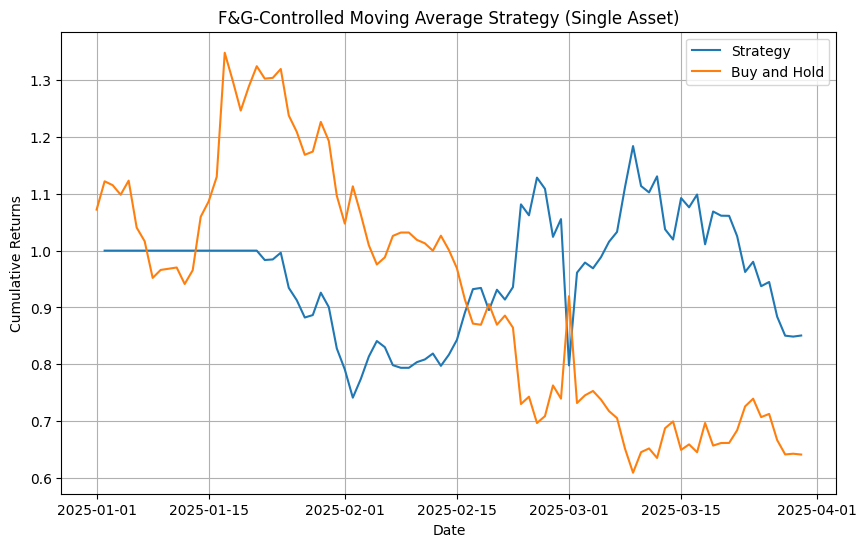

In [32]:
# Calculate returns
df['Return'] = df['Close'].pct_change().shift(-1)  # Next day's return
df['Strategy_Return'] = df['Position'].shift(1) * df['Return']  # Shift to avoid lookahead bias

# Cumulative returns
df['Cumulative_Strategy_Returns'] = (1 + df['Strategy_Return']).cumprod()
df['Cumulative_Asset_Returns'] = (1 + df['Return']).cumprod()

# Plot results
plt.figure(figsize=(10,6))
plt.plot(df.index, df['Cumulative_Strategy_Returns'], label='Strategy')
plt.plot(df.index, df['Cumulative_Asset_Returns'], label='Buy and Hold')
plt.title('F&G-Controlled Moving Average Strategy (Single Asset)')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid()
plt.show()